In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import seaborn
print('seaborn version: {}'.format(seaborn.__version__))


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (6, 3)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

matplotlib version: 3.10.1
seaborn version: 0.13.2


In [2]:
path = 'outlier_dusulmus_veri.csv'
#ri = pd.read_csv(path)  #,encoding='latin-1')
ri1=pd.read_csv(path)

In [3]:
#ri1["make_model"].value_counts()
ri1.groupby(["make", "make_model"]).size().reset_index(name="count")

make                make_model  count
0            Dacia               Dacia Break      1
1            Dacia              Dacia Dokker     55
2            Dacia              Dacia Duster    300
3            Dacia              Dacia Jogger      9
4            Dacia               Dacia Lodgy     67
5            Dacia               Dacia Logan    195
6            Dacia             Dacia Sandero    617
7             Fiat           Fiat 124 Spider     92
8             Fiat                  Fiat 500    303
9             Fiat           Fiat 500 Abarth     24
10            Fiat                 Fiat 500C    179
11            Fiat                 Fiat 500L     88
12            Fiat                 Fiat 500X    320
13            Fiat           Fiat 595 Abarth      6
14            Fiat            Fiat Barchetta     32
15            Fiat                Fiat Brava      1
16            Fiat                Fiat Bravo      6
17            Fiat                Fiat Coupe    148
18            Fiat                Fiat Croma      2
19            Fiat                Fiat Doblo      1
20            Fiat              Fiat Fiorino      2
21            Fiat             Fiat Freemont     10
22            Fiat             Fiat Fullback     11
23            Fiat         Fiat Grande Punto     13
24            Fiat             Fiat Multipla      1
25            Fiat            Fiat New Panda      4
26            Fiat                Fiat Panda     95
27            Fiat                Fiat Punto     48
28            Fiat            Fiat Punto Evo     21
29            Fiat                 Fiat Qubo      8
30            Fiat               Fiat Sedici      4
31            Fiat        Fiat Spider Europa      5
32            Fiat                Fiat Stilo      3
33            Fiat               Fiat Strada      1
34            Fiat              Fiat Talento      2
35            Fiat                 Fiat Tipo    347
36            Ford                Ford B-Max      7
37            Ford               Ford Bronco      2
38            Ford                Ford C-Max      2
39            Ford               Ford Cougar      3
40            Ford             Ford EcoSport     23
41            Ford                 Ford Edge     32
42            Ford               Ford Escort      9
43            Ford             Ford Explorer     11
44            Ford                Ford F 150      2
45            Ford                Ford F 250      1
46            Ford               Ford Fiesta    382
47            Ford                Ford Focus    450
48            Ford             Ford Focus CC     10
49            Ford               Ford Galaxy      1
50            Ford          Ford Grand C-Max      1
51            Ford        Ford Grand Tourneo      1
52            Ford               Ford Ka/Ka+     22
53            Ford                 Ford Kuga    192
54            Ford               Ford Mondeo    153
55            Ford              Ford Mustang    471
56            Ford                Ford Probe      3
57            Ford                 Ford Puma     51
58            Ford               Ford Ranger     32
59            Ford        Ford Ranger Raptor      3
60            Ford                Ford S-Max     10
61            Ford             Ford Streetka      6
62            Ford          Ford Thunderbird      2
63            Ford      Ford Tourneo Connect      4
64            Ford      Ford Tourneo Courier      4
65            Ford       Ford Tourneo Custom     15
66            Ford              Ford Transit      5
67            Ford      Ford Transit Connect      2
68            Ford      Ford Transit Courier      1
69            Ford       Ford Transit Custom      2
70         Hyundai            Hyundai ACCENT      6
71         Hyundai              Hyundai Atos      1
72         Hyundai             Hyundai BAYON     26
73         Hyundai             Hyundai Coupe     61
74         Hyundai           Hyundai ELANTRA     24
75         Hyundai           Hyundai Genesis     27
76        

In [4]:
ri1.isna().sum()

make_model                     0
make                           0
model                          0
location                       0
price                          0
body_type                      0
type                           0
mileage                        0
gearbox                        0
paint                          0
seller                         0
power                          0
engine_size                    0
CO2_emissions                  0
empty_weight                   0
full_service_history           0
upholstery                     0
previous_owner                 0
age                            0
fuel_type                      0
cons_avg                       0
comfort_convenience_count_z    0
entertainment_media_count_z    0
safety_security_count_z        0
extras_count_z                 0
dtype: int64

In [7]:

# 1) ‚Äúnan Value‚Äù metinlerini ger√ßek NaN‚Äôa d√∂n√º≈üt√ºrd√ºyseniz zaten fuel_type‚Äôda NaN kalmƒ±≈ü durumda.
#    Eƒüer hen√ºz yapmadƒ±ysanƒ±z:
#
ri1['fuel_type'] = ri1['fuel_type'].replace('nan Value', np.nan)

# 2) make_model bazlƒ± mode haritasƒ±nƒ± olu≈ütur
#    Her make_model i√ßin fuel_type‚Äôƒ±n en sƒ±k g√∂r√ºlen (ilk mod) deƒüerini alƒ±yoruz.
make_model_mode = ri1.groupby('make_model')['fuel_type'] \
                    .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan)

# 3) make bazlƒ± mode haritasƒ±nƒ± olu≈ütur (eƒüer make_model‚Äôda mod yoksa kullanmak i√ßin)
make_mode = ri1.groupby('make')['fuel_type'] \
             .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan)

# 4) Dataset geneli i√ßin genel mode‚Äôu bul
overall_mode = ri1['fuel_type'].mode().iloc[0]

# 5) ‚Äúfuel_type‚Äù doldurma adƒ±mlarƒ±:
#
#    a) √ñnce make_model level‚Äôda NaN olanlarƒ±, kendi make_model grubunun mod‚Äôu ile doldur
ri1['fuel_type'] = ri1.apply(
    lambda row: make_model_mode[row['make_model']] 
                if pd.isna(row['fuel_type']) and pd.notna(make_model_mode[row['make_model']]) 
                else row['fuel_type'],
    axis=1
)

#    b) H√¢l√¢ NaN kalanlara, kendi make grubunun mode‚Äôunu atayƒ±n
ri1['fuel_type'] = ri1.apply(
    lambda row: make_mode[row['make']] 
                if pd.isna(row['fuel_type']) and pd.notna(make_mode[row['make']]) 
                else row['fuel_type'],
    axis=1
)

#    c) Yine NaN kalan varsa, genel mode‚Äôu ata
ri1['fuel_type'].fillna(overall_mode, inplace=True)

# 6) Sonu√ßlarƒ± kontrol edelim
print(ri1['fuel_type'].isna().sum())         # 0 d√∂necek, artƒ±k NaN kalmadƒ±
print(ri1['fuel_type'].value_counts())       # Hangi yakƒ±t tiplerinden ka√ß tane kaldƒ±ƒüƒ±nƒ± g√∂rebilirsiniz

0
fuel_type
Petrol      15442
Diesel       8651
Gas           323
Others        269
Electric       55
Name: count, dtype: int64


In [8]:
ri1.dtypes

make_model                      object
make                            object
model                           object
location                        object
price                          float64
body_type                       object
type                            object
mileage                        float64
gearbox                         object
paint                           object
seller                          object
power                          float64
engine_size                    float64
CO2_emissions                  float64
empty_weight                   float64
full_service_history            object
upholstery                      object
previous_owner                   int64
age                            float64
fuel_type                       object
cons_avg                       float64
comfort_convenience_count_z    float64
entertainment_media_count_z    float64
safety_security_count_z        float64
extras_count_z                 float64
dtype: object

In [13]:
ri1.describe().T

count          mean           std          min  \
price                        24740.0  22045.678173  17858.574942  1000.000000   
mileage                      24740.0  75567.922191  60160.091500   105.000000   
power                        24740.0    162.367967     85.926783    54.000000   
engine_size                  24740.0   1752.780861    699.246171   332.000000   
CO2_emissions                24740.0    130.807842     54.832542     0.000000   
empty_weight                 24740.0   1422.107963    254.819953   900.000000   
previous_owner               24740.0      0.705780      0.925133     0.000000   
age                          24740.0      6.134256      5.636948     0.000000   
cons_avg                     24740.0      6.234238      2.142796     1.000000   
comfort_convenience_count_z  24740.0      0.038831      0.990521    -1.441825   
entertainment_media_count_z  24740.0      0.010786      0.983173    -1.285381   
safety_security_count_z      24740.0      0.036085      0.974180    -1.591889   
extras_count_z               24740.0      0.027886      1.008839    -1.044769   

                                      25%           50%            75%  \
price                        11900.000000  17000.000000   26999.000000   
mileage                      26829.000000  62450.500000  109752.250000   
power                          110.000000    136.000000     190.000000   
engine_size                   1364.000000   1598.000000    1984.000000   
CO2_emissions                  104.000000    124.000000     156.000000   
empty_weight                  1273.000000   1395.000000    1536.000000   
previous_owner                   0.000000      0.000000       1.000000   
age                              2.000000      4.000000       8.000000   
cons_avg                         4.900000      5.650000       7.000000   
comfort_convenience_count_z     -0.811841     -0.055860       0.826117   
entertainment_media_count_z     -0.760975      0.025634       0.812243   
safety_security_count_z         -0.597900      0.023344       0.768836   
extras_count_z                  -0.784028     -0.262545       0.519680   

                                       max  
price                        200000.000000  
mileage                      300000.000000  
power                           600.000000  
engine_size                    6208.000000  
CO2_emissions                   300.000000  
empty_weight                   2900.000000  
previous_owner                   14.000000  
age                              30.000000  
cons_avg                         15.000000  
comfort_convenience_count_z       2.842066  
entertainment_media_count_z       2.909867  
safety_security_count_z           2.881063  
extras_count_z                    5.734510

In [9]:
for col in ['make', 'make_model', 'body_type', 'gearbox', 'fuel_type', 'location']:
    print(col, ":", ri1[col].nunique(), "farklƒ± deƒüer")
    print(ri1[col].value_counts().head(), "\n")

make : 13 farklƒ± deƒüer
make
Volvo            3411
Opel             2171
Mercedes-Benz    2141
Peugeot          2077
Renault          1983
Name: count, dtype: int64 

make_model : 482 farklƒ± deƒüer
make_model
Renault Megane    813
SEAT Leon         744
Volvo V40         740
Volvo C70         666
Opel Astra        653
Name: count, dtype: int64 

body_type : 6 farklƒ± deƒüer
body_type
Station wagon       4989
Off-Road/Pick-up    4688
Compact             4663
Sedan               4320
Coupe               3202
Name: count, dtype: int64 

gearbox : 3 farklƒ± deƒüer
gearbox
Manual            14972
Automatic          9709
Semi-automatic       59
Name: count, dtype: int64 

fuel_type : 5 farklƒ± deƒüer
fuel_type
Petrol      15442
Diesel       8651
Gas           323
Others        269
Electric       55
Name: count, dtype: int64 

location : 8 farklƒ± deƒüer
location
DE    10871
ES     5932
NL     2494
IT     2044
BE     1661
Name: count, dtype: int64 



In [10]:
# ‚Äúnan Value‚Äù deƒüerlerini ger√ßek NaN‚Äôa √ßevir
#ri1['fuel_type'] = ri1['fuel_type'].replace('nan Value', np.nan)

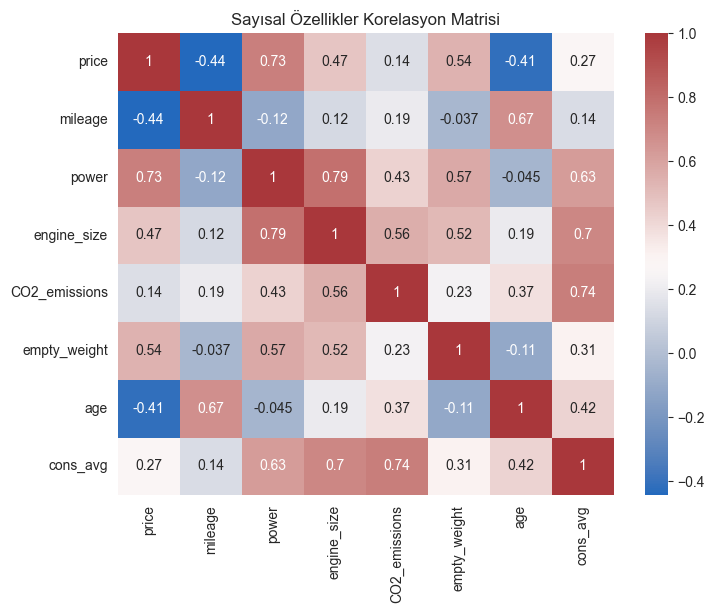

In [10]:
corr = ri1[['price','mileage','power','engine_size','CO2_emissions','empty_weight','age','cons_avg']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='vlag')
plt.title("Sayƒ±sal √ñzellikler Korelasyon Matrisi")
plt.show()

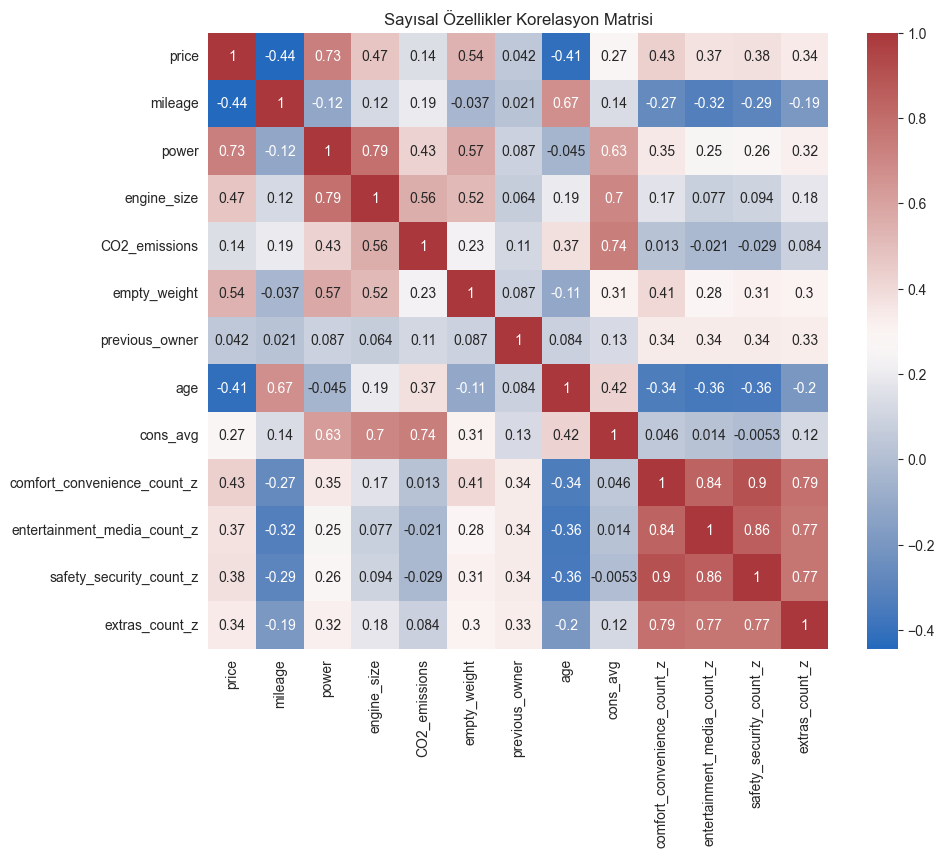

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    'price', 'mileage', 'power', 'engine_size', 'CO2_emissions', 'empty_weight',
    'previous_owner', 'age', 'cons_avg', 'comfort_convenience_count_z',
    'entertainment_media_count_z', 'safety_security_count_z', 'extras_count_z'
]

corr_matrix = ri1[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag')
plt.title("Sayƒ±sal √ñzellikler Korelasyon Matrisi")
plt.show()

In [11]:

# 1) ‚Äúage_times_mileage‚Äù ‚Äî Ya≈ü x Kilometre
ri1['age_times_mileage'] = ri1['age'] * ri1['mileage']

# 2) ‚Äúpower_per_cc‚Äù ‚Äî Beygir g√ºc√º (hp) / Motor hacmi (cc)
ri1['power_per_cc'] = ri1['power'] / ri1['engine_size']
ri1['power_per_cc'] = ri1['power_per_cc'].replace([float('inf'), -float('inf')], pd.NA)

# 3) ‚Äúco2_per_liter‚Äù ‚Äî CO‚ÇÇ emisyonu / (L/100 km ‚Üí L/km)
ri1['cons_per_km']    = ri1['cons_avg'] / 100                           # L/km
ri1['co2_per_liter']  = ri1['CO2_emissions'] / ri1['cons_per_km']       # g CO‚ÇÇ / L
ri1['co2_per_liter']  = ri1['co2_per_liter'].replace([float('inf'), -float('inf')], pd.NA)

# (ƒ∞steƒüe baƒülƒ±) Artƒ±k ‚Äúcons_per_km‚Äù ge√ßici s√ºtununuzu silebilirsiniz:
ri1.drop(columns=['cons_per_km'], inplace=True)

# Yeni s√ºtunlarƒ± kontrol edin:
print(ri1[['age_times_mileage', 'power_per_cc', 'co2_per_liter']].head())

   age_times_mileage  power_per_cc  co2_per_liter
0                0.0      0.091275    2000.000000
1           305920.0      0.050000    2541.176471
2           305920.0      0.050000    2541.176471
3           649964.0      0.061602    2322.580645
4           249060.0      0.060000    2541.176471


In [12]:
# 1) Ya≈üƒ± sƒ±fƒ±r olan ara√ßlarƒ± se√ß
zero_age_cars = ri1[ri1['age'] == 0]

# 2) Ka√ß tane olduƒüunu bul
count_zero = zero_age_cars.shape[0]

# 3) Bu ara√ßlarƒ±n ortalama kilometresi
mean_mileage_zero = zero_age_cars['mileage'].mean()

print(f"Ya≈üƒ± sƒ±fƒ±r olan ara√ß sayƒ±sƒ±: {count_zero}")
print(f"Ya≈üƒ± sƒ±fƒ±r olan ara√ßlarƒ±n ortalama kilometresi: {mean_mileage_zero:.2f} km")

Ya≈üƒ± sƒ±fƒ±r olan ara√ß sayƒ±sƒ±: 1432
Ya≈üƒ± sƒ±fƒ±r olan ara√ßlarƒ±n ortalama kilometresi: 5807.22 km


In [13]:
ri1[['age_times_mileage', 'power_per_cc', 'co2_per_liter']].isna().sum()

age_times_mileage    0
power_per_cc         0
co2_per_liter        0
dtype: int64

In [14]:
# √ñrneƒüin, yalnƒ±zca age_times_mileage tutup age ve mileage‚Äôƒ± √ßƒ±karabilirsiniz:
ri1.drop(columns=['age','mileage'], inplace=True)

In [15]:
# √ñrneƒüin sadece power_per_cc kalsƒ±n, power ve engine_size‚Äôƒ± √ßƒ±karƒ±n:
ri1.drop(columns=['power','engine_size'], inplace=True)


In [16]:
# √ñrneƒüin sadece co2_per_liter kalsƒ±n, CO2_emissions ve cons_avg‚Äôƒ± √ßƒ±karƒ±n:
ri1.drop(columns=['CO2_emissions','cons_avg'], inplace=True)

In [17]:

# 1) Korelasyon hesaplanacak yeni sayƒ±sal s√ºtunlar
numeric_cols_new = [
    'price',
    'empty_weight',
    'age_times_mileage',
    'power_per_cc',
    'co2_per_liter'
]

# 2) Korelasyon matrisi olu≈ütur
corr_new = ri1[numeric_cols_new].corr()

# 3) Isƒ± haritasƒ± √ßizimi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_new, annot=True, cmap='vlag')
plt.title("G√ºncellenmi≈ü Sayƒ±sal √ñzellikler Korelasyon Matrisi")
plt.show()

In [18]:
ri1.columns

Index(['make_model', 'make', 'model', 'location', 'price', 'body_type', 'type',
       'gearbox', 'paint', 'seller', 'empty_weight', 'full_service_history',
       'upholstery', 'previous_owner', 'fuel_type',
       'comfort_convenience_count_z', 'entertainment_media_count_z',
       'safety_security_count_z', 'extras_count_z', 'age_times_mileage',
       'power_per_cc', 'co2_per_liter'],
      dtype='object')

üìå S√ºtun: make_model
   ‚Ä¢ Unique count: 482
   ‚Ä¢ First 20 values: ['Dacia Break', 'Dacia Dokker', 'Dacia Duster', 'Dacia Jogger', 'Dacia Lodgy', 'Dacia Logan', 'Dacia Sandero', 'Fiat 124 Spider', 'Fiat 500', 'Fiat 500 Abarth', 'Fiat 500C', 'Fiat 500L', 'Fiat 500X', 'Fiat 595 Abarth', 'Fiat Barchetta', 'Fiat Brava', 'Fiat Bravo', 'Fiat Coupe', 'Fiat Croma', 'Fiat Doblo'] ‚Ä¶

--------------------------------------------------

üìå S√ºtun: make
   ‚Ä¢ Unique count: 13
   ‚Ä¢ Values: ['Dacia', 'Fiat', 'Ford', 'Hyundai', 'Mercedes-Benz', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'SEAT', 'Skoda', 'Toyota', 'Volvo']

--------------------------------------------------

üìå S√ºtun: model
   ‚Ä¢ Unique count: 480
   ‚Ä¢ First 20 values: ['Break', 'Dokker', 'Duster', 'Jogger', 'Lodgy', 'Logan', 'Sandero', '124 Spider', '500', '500 Abarth', '500C', '500L', '500X', '595 Abarth', 'Barchetta', 'Brava', 'Bravo', 'Coupe', 'Croma', 'Doblo'] ‚Ä¶

--------------------------------------------------

In [19]:
ri1['location'].value_counts()

location
DE    10871
ES     5932
NL     2494
IT     2044
BE     1661
FR     1221
AT      486
LU       31
Name: count, dtype: int64

In [20]:
# Premium kabul edilecek d√∂≈üeme t√ºrleri (k√º√ß√ºk harfe d√∂n√º≈üt√ºr√ºlm√º≈ü halde)
premium_types = {'full leather', 'part leather', 'alcantara'}

# Yeni ikili s√ºtunu olu≈ütur:
#   - D√∂≈üeme metnini .str.lower() ile k√º√ß√ºk harfe √ßevirip premium_types i√ßinde mi diye bakƒ±yoruz
#   - True ise 'premium', False ise 'standard' atƒ±yoruz
ri1['upholstery_binary'] = ri1['upholstery'].str.lower().isin(premium_types).map({True: 'premium', False: 'standard'})

# Sonu√ß kontrol√º
print(ri1[['upholstery', 'upholstery_binary']].sample(10))

         upholstery upholstery_binary
7219   Full leather           premium
9679          Cloth          standard
11253         Cloth          standard
7368   Full leather           premium
9265          Cloth          standard
11951  Full leather           premium
8832   Full leather           premium
5825          Cloth          standard
20461         Cloth          standard
18889         Cloth          standard


In [21]:
# Orijinal 'upholstery' s√ºtununu kaldƒ±rƒ±p, binary s√ºtunu yeniden 'upholstery' olarak adlandƒ±ralƒ±m
ri1.drop(columns=['upholstery'], inplace=True)
ri1.rename(columns={'upholstery_binary': 'upholstery'}, inplace=True)

# Kontrol
print(ri1['upholstery'].value_counts())



upholstery
standard    14217
premium     10523
Name: count, dtype: int64


In [22]:
ri1['previous_owner'].value_counts(dropna=False)


previous_owner
0     12559
1      8346
2      2971
3       589
4       147
5        53
6        32
7        15
9        13
8        10
10        2
12        1
14        1
13        1
Name: count, dtype: int64

In [23]:
ri1 = ri1[ri1['previous_owner'] < 7].reset_index(drop=True)


In [24]:
ri1['previous_owner'].value_counts(dropna=False)


previous_owner
0    12559
1     8346
2     2971
3      589
4      147
5       53
6       32
Name: count, dtype: int64

In [42]:
# 1. Her s√ºtun i√ßin unique deƒüerleri ve sayƒ±sƒ±nƒ± yazdƒ±r
for col in ri1.columns:
    uniques = ri1[col].dropna().unique()  # NaN'leri dƒ±≈üarƒ±da bƒ±rakmak i√ßin dropna()
    count = len(uniques)
    
    print(f"üìå S√ºtun: {col}")
    print(f"   ‚Ä¢ Unique count: {count}")
    
    # Eƒüer √ßok fazla benzersiz deƒüer varsa listeyi kƒ±saltmak i√ßin:
    if count <= 20:
        # 20‚Äôden azsa hepsini g√∂ster
        print(f"   ‚Ä¢ Values: {uniques.tolist()}")
    else:
        # 20‚Äôden fazlaysa ilk 20‚Äôsini g√∂ster
        print(f"   ‚Ä¢ First 20 values: {uniques[:20].tolist()} ‚Ä¶")
    print("\n" + "-"*50 + "\n")

üìå S√ºtun: location
   ‚Ä¢ Unique count: 8
   ‚Ä¢ Values: ['BE', 'ES', 'DE', 'FR', 'IT', 'AT', 'NL', 'LU']

--------------------------------------------------

üìå S√ºtun: price
   ‚Ä¢ Unique count: 4426
   ‚Ä¢ First 20 values: [20500.0, 12690.0, 13475.0, 14990.0, 7200.0, 9990.0, 13680.0, 12500.0, 11980.0, 15250.0, 15700.0, 4790.0, 11930.0, 13500.0, 11990.0, 12490.0, 13900.0, 14845.0, 14500.0, 8900.0] ‚Ä¶

--------------------------------------------------

üìå S√ºtun: body_type
   ‚Ä¢ Unique count: 6
   ‚Ä¢ Values: ['Station wagon', 'Compact', 'Sedan', 'Off-Road/Pick-up', 'Convertible', 'Coupe']

--------------------------------------------------

üìå S√ºtun: type
   ‚Ä¢ Unique count: 4
   ‚Ä¢ Values: ['Demonstration', 'Used', 'Pre-registered', "Employee's car"]

--------------------------------------------------

üìå S√ºtun: gearbox
   ‚Ä¢ Unique count: 2
   ‚Ä¢ Values: ['Manual', 'Automatic']

--------------------------------------------------

üìå S√ºtun: paint
   ‚Ä¢ Unique

In [25]:
# ‚ÄúSemi-automatic‚Äù deƒüerlerini ‚ÄúAutomatic‚Äù olarak g√ºncelleyelim
ri1['gearbox'] = ri1['gearbox'].replace({'Semi-automatic': 'Automatic'})

# Deƒüi≈üikliƒüi kontrol etmek i√ßin:
print(ri1['gearbox'].value_counts())

gearbox
Manual       14941
Automatic     9756
Name: count, dtype: int64


In [26]:
ri1.dtypes

make_model                      object
make                            object
model                           object
location                        object
price                          float64
body_type                       object
type                            object
gearbox                         object
paint                           object
seller                          object
empty_weight                   float64
full_service_history            object
previous_owner                   int64
fuel_type                       object
comfort_convenience_count_z    float64
entertainment_media_count_z    float64
safety_security_count_z        float64
extras_count_z                 float64
age_times_mileage              float64
power_per_cc                   float64
co2_per_liter                  float64
upholstery                      object
dtype: object

In [27]:
# 1. Her s√ºtun i√ßin unique deƒüerleri ve sayƒ±sƒ±nƒ± yazdƒ±r
for col in ri1.columns:
    uniques = ri1[col].dropna().unique()  # NaN'leri dƒ±≈üarƒ±da bƒ±rakmak i√ßin dropna()
    count = len(uniques)
    
    print(f"üìå S√ºtun: {col}")
    print(f"   ‚Ä¢ Unique count: {count}")
    
    # Eƒüer √ßok fazla benzersiz deƒüer varsa listeyi kƒ±saltmak i√ßin:
    if count <= 20:
        # 20‚Äôden azsa hepsini g√∂ster
        print(f"   ‚Ä¢ Values: {uniques.tolist()}")
    else:
        # 20‚Äôden fazlaysa ilk 20‚Äôsini g√∂ster
        print(f"   ‚Ä¢ First 20 values: {uniques[:20].tolist()} ‚Ä¶")
    print("\n" + "-"*50 + "\n")

üìå S√ºtun: make_model
   ‚Ä¢ Unique count: 482
   ‚Ä¢ First 20 values: ['Dacia Break', 'Dacia Dokker', 'Dacia Duster', 'Dacia Jogger', 'Dacia Lodgy', 'Dacia Logan', 'Dacia Sandero', 'Fiat 124 Spider', 'Fiat 500', 'Fiat 500 Abarth', 'Fiat 500C', 'Fiat 500L', 'Fiat 500X', 'Fiat 595 Abarth', 'Fiat Barchetta', 'Fiat Brava', 'Fiat Bravo', 'Fiat Coupe', 'Fiat Croma', 'Fiat Doblo'] ‚Ä¶

--------------------------------------------------

üìå S√ºtun: make
   ‚Ä¢ Unique count: 13
   ‚Ä¢ Values: ['Dacia', 'Fiat', 'Ford', 'Hyundai', 'Mercedes-Benz', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'SEAT', 'Skoda', 'Toyota', 'Volvo']

--------------------------------------------------

üìå S√ºtun: model
   ‚Ä¢ Unique count: 480
   ‚Ä¢ First 20 values: ['Break', 'Dokker', 'Duster', 'Jogger', 'Lodgy', 'Logan', 'Sandero', '124 Spider', '500', '500 Abarth', '500C', '500L', '500X', '595 Abarth', 'Barchetta', 'Brava', 'Bravo', 'Coupe', 'Croma', 'Doblo'] ‚Ä¶

--------------------------------------------------

In [28]:
import pandas as pd

# (ƒ∞sterseniz √∂nceden index‚Äôi sƒ±fƒ±rlayabilirsiniz, ama zorunlu deƒüil)
ri1.reset_index(drop=True, inplace=True)

# 1) ‚Äúmake‚Äù s√ºtununu one-hot encode et
ri1 = pd.get_dummies(ri1, columns=['make'], prefix='make')

# 2) ‚Äúmake_model‚Äù i√ßin pandas.factorize ile label-encoding
ri1['make_model_le'] = pd.factorize(ri1['make_model'])[0]

# 3) ‚Äúmodel‚Äù ve orijinal ‚Äúmake_model‚Äù s√ºtunlarƒ±nƒ± silebilirsiniz
ri1.drop(columns=['model', 'make_model'], inplace=True)

# 4) Kolonlarƒ±n son hali
print(ri1.columns.tolist())

['location', 'price', 'body_type', 'type', 'gearbox', 'paint', 'seller', 'empty_weight', 'full_service_history', 'previous_owner', 'fuel_type', 'comfort_convenience_count_z', 'entertainment_media_count_z', 'safety_security_count_z', 'extras_count_z', 'age_times_mileage', 'power_per_cc', 'co2_per_liter', 'upholstery', 'make_Dacia', 'make_Fiat', 'make_Ford', 'make_Hyundai', 'make_Mercedes-Benz', 'make_Nissan', 'make_Opel', 'make_Peugeot', 'make_Renault', 'make_SEAT', 'make_Skoda', 'make_Toyota', 'make_Volvo', 'make_model_le']


In [29]:


# 1) ƒ∞kili (binary) kategorik s√ºtunlarƒ± 0/1‚Äôe d√∂n√º≈üt√ºrmek i√ßin map s√∂zl√ºkleri
binary_maps = {
    'gearbox': {
        'Manual': 0,
        'Automatic': 1
    },
    'paint': {
        'Non-Metallic': 0,
        'Metalic':       1
    },
    'seller': {
        'Dealer':         0,
        'Private seller': 1
    },
    'full_service_history': {
        'no':  0,
        'yes': 1
    },
    'upholstery': {
        'standard': 0,
        'premium':  1
    }
}

# Uygula
ri1.replace(binary_maps, inplace=True)

# 2) One-Hot Encoding yapƒ±lacak s√ºtunlar
one_hot_cols = [
    'location',
    'body_type',
    'type',
    'fuel_type'
]

# One-Hot Encoding (drop_first=True ile her s√ºtunda ilk kategori atƒ±lƒ±r)
ri1 = pd.get_dummies(
    ri1,
    columns=one_hot_cols,
    prefix=one_hot_cols,
    drop_first=True
)

# 3) ‚Äúprevious_owner‚Äù zaten int64; olduƒüu gibi bƒ±rakƒ±yoruz

# 4) Son hali kontrol
print("Yeni s√ºtun sayƒ±sƒ±:", ri1.shape[1])
print("√ñrnek s√ºtunlar:", ri1.columns[:20].tolist())

Yeni s√ºtun sayƒ±sƒ±: 48
√ñrnek s√ºtunlar: ['price', 'gearbox', 'paint', 'seller', 'empty_weight', 'full_service_history', 'previous_owner', 'comfort_convenience_count_z', 'entertainment_media_count_z', 'safety_security_count_z', 'extras_count_z', 'age_times_mileage', 'power_per_cc', 'co2_per_liter', 'upholstery', 'make_Dacia', 'make_Fiat', 'make_Ford', 'make_Hyundai', 'make_Mercedes-Benz']


In [30]:

ri1.columns

Index(['price', 'gearbox', 'paint', 'seller', 'empty_weight',
       'full_service_history', 'previous_owner', 'comfort_convenience_count_z',
       'entertainment_media_count_z', 'safety_security_count_z',
       'extras_count_z', 'age_times_mileage', 'power_per_cc', 'co2_per_liter',
       'upholstery', 'make_Dacia', 'make_Fiat', 'make_Ford', 'make_Hyundai',
       'make_Mercedes-Benz', 'make_Nissan', 'make_Opel', 'make_Peugeot',
       'make_Renault', 'make_SEAT', 'make_Skoda', 'make_Toyota', 'make_Volvo',
       'make_model_le', 'location_BE', 'location_DE', 'location_ES',
       'location_FR', 'location_IT', 'location_LU', 'location_NL',
       'body_type_Convertible', 'body_type_Coupe',
       'body_type_Off-Road/Pick-up', 'body_type_Sedan',
       'body_type_Station wagon', 'type_Employee's car', 'type_Pre-registered',
       'type_Used', 'fuel_type_Electric', 'fuel_type_Gas', 'fuel_type_Others',
       'fuel_type_Petrol'],
      dtype='object')

In [38]:
ri1.sample(38)

price  gearbox  paint  seller  empty_weight  full_service_history  \
14736   29995.0        1      1       0        1430.0                     0   
20799   46750.0        1      0       0        1504.0                     0   
3537    20950.0        0      1       0        1263.0                     1   
252     25190.0        0      1       0        1406.0                     1   
15960   10345.0        0      1       0        1362.0                     1   
15412   12900.0        0      1       0        1469.0                     1   
16004   21990.0        1      0       0        1505.0                     0   
9952    20490.0        0      0       0        1379.0                     0   
13779   12890.0        0      1       0        1160.0                     0   
2365    38700.0        0      0       1        1310.0                     0   
9755    12190.0        0      1       0        1370.0                     1   
630     14409.0        0      0       0        1090.0                     0   
18163   27480.0        1      1       0        1377.0                     0   
1244    38970.0        0      0       0        1135.0                     0   
22699   19900.0        0      0       0        1463.0                     0   
6793    22950.0        1      1       0        1365.0                     1   
2010    18900.0        0      0       0        1504.0                     0   
937      9990.0        0      0       0        1023.0                     0   
3382    18300.0        1      1       0        1206.0                     1   
13004    3450.0        0      1       1        1261.0                     0   
632     14990.0        0      0       0        1033.0                     0   
17510   18900.0        1      1       0        1332.0                     0   
5462    20480.0        0      1       0        1524.0                     1   
20066   21490.0        1      0       0        1333.0                     0   
17456   19990.0        0      1       0        1333.0                     1   
15727   13490.0        0      0       0        1312.0                     0   
11723   16490.0        0      1       0        1055.0                     1   
9235     4490.0        0      0       0        1090.0                     0   
1402     9900.0        0      0       0        1365.0                     0   
19877   16890.0        0      0       0        1454.0                     0   
17718   16990.0        0      0       0        1239.0                     1   
2194    15390.0        0      0       0        1320.0                     0   
15061   16500.0        0      0       0        1365.0                     0   
17539   18990.0        1      0       0        1370.0                     1   
4481    39990.0        1      1       0        1840.0                     1   
6716    17990.0        0      0       0        1445.0                     1   
19914   11450.0        0      0       0        1490.0                     0   
8496   133870.0        1      1       0        2070.0                     1   

       previous_owner  comfort_convenience_count_z  \
14736               0                    -0.181857   
20799               0                    -1.441825   
3537                0                     1.456101   
252                 1                     0.826117   
15960               6                    -0.055860   
15412               1                     0.952114   
16004               0                     1.078111   
9952                0                    -0.685844   
13779               1                    -1.063835   
2365                0                    -0.811841   
9755                2                     0.196133   
630                 0                    -0.811841   
18163               1                     0.826117   
1244                0                    -0.811841   
22699               0                    -0.685844   
6793                0                     0.700121   
2010      

In [32]:
ri1.isna().sum()


price                          0
gearbox                        0
paint                          0
seller                         0
empty_weight                   0
full_service_history           0
previous_owner                 0
comfort_convenience_count_z    0
entertainment_media_count_z    0
safety_security_count_z        0
extras_count_z                 0
age_times_mileage              0
power_per_cc                   0
co2_per_liter                  0
upholstery                     0
make_Dacia                     0
make_Fiat                      0
make_Ford                      0
make_Hyundai                   0
make_Mercedes-Benz             0
make_Nissan                    0
make_Opel                      0
make_Peugeot                   0
make_Renault                   0
make_SEAT                      0
make_Skoda                     0
make_Toyota                    0
make_Volvo                     0
make_model_le                  0
location_BE                    0
location_D

In [33]:
ri1.dtypes

price                          float64
gearbox                          int64
paint                            int64
seller                           int64
empty_weight                   float64
full_service_history             int64
previous_owner                   int64
comfort_convenience_count_z    float64
entertainment_media_count_z    float64
safety_security_count_z        float64
extras_count_z                 float64
age_times_mileage              float64
power_per_cc                   float64
co2_per_liter                  float64
upholstery                       int64
make_Dacia                        bool
make_Fiat                         bool
make_Ford                         bool
make_Hyundai                      bool
make_Mercedes-Benz                bool
make_Nissan                       bool
make_Opel                         bool
make_Peugeot                      bool
make_Renault                      bool
make_SEAT                         bool
make_Skoda               

In [37]:
ri1.shape


(24697, 48)

In [39]:
# 1) Veri √ßer√ßevesindeki Boolean tipli s√ºtunlarƒ± bul
bool_cols = ri1.select_dtypes(include='bool').columns.tolist()

# 2) Her birini int tipine d√∂n√º≈üt√ºr (True‚Üí1, False‚Üí0)
for col in bool_cols:
    ri1[col] = ri1[col].astype(int)

# 3) Kontrol: artƒ±k hepsi 0/1 olmalƒ±
print(ri1[bool_cols].head(10))

   make_Dacia  make_Fiat  make_Ford  make_Hyundai  make_Mercedes-Benz  \
0           1          0          0             0                   0   
1           1          0          0             0                   0   
2           1          0          0             0                   0   
3           1          0          0             0                   0   
4           1          0          0             0                   0   
5           1          0          0             0                   0   
6           1          0          0             0                   0   
7           1          0          0             0                   0   
8           1          0          0             0                   0   
9           1          0          0             0                   0   

   make_Nissan  make_Opel  make_Peugeot  make_Renault  make_SEAT  make_Skoda  \
0            0          0             0             0          0           0   
1            0          0           

In [42]:
ri1.sample(50)

price  gearbox  paint  seller  empty_weight  full_service_history  \
4400   42495.0        1      1       0        1803.0                     1   
20244   4490.0        0      1       0        1365.0                     0   
19091  21990.0        0      1       0        1467.0                     1   
21227  18950.0        1      1       0        1050.0                     1   
2742   14750.0        0      0       0        1320.0                     0   
18467   8945.0        0      0       0         955.0                     0   
2671   11500.0        0      0       0        1290.0                     0   
18818  34960.0        1      1       0        1504.0                     0   
10872  23365.0        1      1       0        1345.0                     1   
7579   61499.0        1      0       0        1454.0                     1   
19429  23490.0        0      1       0        1333.0                     1   
18015  28886.0        1      0       0        1545.0                     1   
8354   46900.0        1      1       0        2580.0                     1   
6075   28499.0        0      0       0        1169.0                     0   
19925   6500.0        0      0       0        1335.0                     0   
22448  37600.0        1      0       0        2077.0                     0   
6270   24891.0        0      1       0        1488.0                     1   
15976  16999.0        0      1       1        1387.0                     0   
2706   15900.0        0      1       0        1320.0                     0   
11207  19640.0        1      1       0        1365.0                     1   
12258  32990.0        1      1       0        1582.0                     0   
16437  52777.0        1      1       0        1333.0                     1   
5186   21950.0        1      1       0        1470.0                     1   
8675   35990.0        1      1       0        1795.0                     1   
6836   43900.0        1      0       0        1517.5                     0   
1727   17990.0        0      1       0        1000.0                     1   
21908  17500.0        1      1       1        1625.0                     1   
17880  17280.0        1      0       0        1335.0                     1   
22810  15136.0        0      0       0        1423.0                     0   
13799   4990.0        0      0       0        1482.0                     0   
19270  11790.0        0      1       0        1170.0                     0   
5943   13500.0        1      0       0        1454.0                     0   
15294   4950.0        0      1       0        1095.0                     1   
12605  15900.0        0      0       0        1733.0                     0   
22366  35473.0        1      1       0        1614.0                     1   
21631  15900.0        0      1       0        1575.0                     1   
2001   19700.0        0      0       0        1333.0                     0   
5040   12700.0        0      0       0        1161.0                     0   
20182  30299.0        1      0       0        1333.0                     0   
24660  70999.0        1      1       0        2328.0                     1   
15666   5500.0        0      0       1        1320.0                     0   
12115  24950.0        0      0       0        1454.0                     1   
16239  17995.0        0      0       0        1234.0                     1   
9895   18800.0        0      0       0        1169.0                     0   
23438  46880.0        1      1       0        2061.0                     1   
14390  16890.0        0      0       0        1333.0                     0   
100    21690.0        0      1       0        1480.0                     1   
15251  12990.0        0      0       0        1333.0                     0   
10081  20990.0        1      1       0        1390.0                     1   
8619   26880.0        1      1       0        1605.0                     1   

       previous_owner  comfort

In [43]:
# ƒ∞steƒüe baƒülƒ±: ƒ∞ndeksi sƒ±fƒ±rla
ri1.reset_index(drop=True, inplace=True)



In [44]:
# CSV‚Äôye kaydet
ri1.to_csv("dummy_zafer_auto.csv", index=False)